In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler

In [2]:
# importing crop data of year 2020
crop_data = pd.read_csv('./data/ndvi/crop_data_ndvi.csv')

In [3]:
X = crop_data.drop(columns=['Class of Land', 'Latitude and Longitude'])
y = crop_data['Class of Land']

del crop_data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [5]:
X_train.head()

,vh,vv,RVI,ndvi_mean,ndvi_max,ndvi_min
284,0.036014,0.443425,0.082352,0.542609,0.805956,0.184204
423,0.003684,0.009637,0.581758,0.284985,0.446060,-0.015730
525,0.001277,0.009442,0.164501,0.332897,0.473339,0.194668
519,0.003332,0.011909,0.408933,0.339952,0.462555,0.208814
12,0.002195,0.021262,0.114485,0.580214,0.839184,0.090096


In [6]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

    Non Rice       0.99      0.93      0.96       245
        Rice       0.94      0.99      0.96       235

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480



In [8]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Non Rice       0.98      0.96      0.97        55
        Rice       0.97      0.98      0.98        65

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



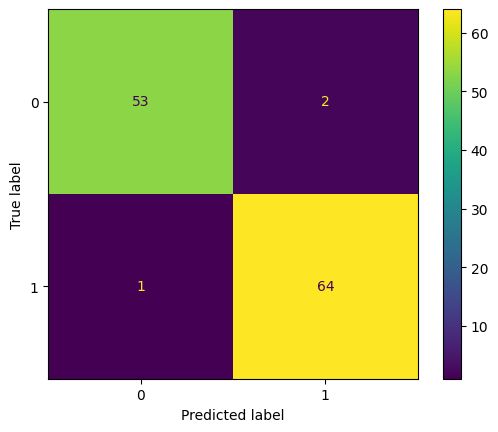

In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [10]:
model = SVC()

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf'],
    'gamma': ['auto', 'scale']
}

grid = GridSearchCV(model, params, n_jobs=-1, verbose=1, cv=50)
grid.fit(X_train, y_train)

grid.best_score_, grid.best_params_

Fitting 50 folds for each of 20 candidates, totalling 1000 fits


(0.9937777777777778, {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'})

In [11]:
model = grid.best_estimator_

model.fit(X_train, y_train)

SVC(C=1000)

In [12]:
y_pred = model.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

    Non Rice       1.00      1.00      1.00       245
        Rice       1.00      1.00      1.00       235

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [13]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Non Rice       0.98      1.00      0.99        55
        Rice       1.00      0.98      0.99        65

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



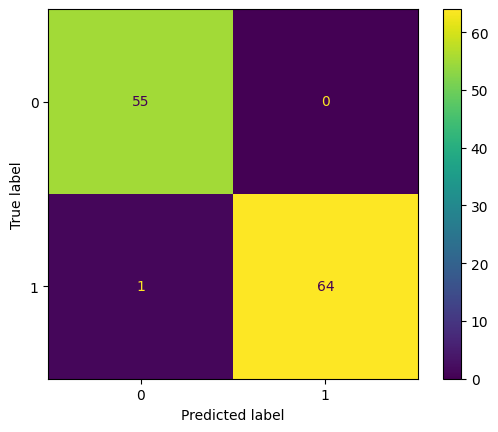

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## On validation data

In [15]:
X_val = pd.read_csv('./data/ndvi/validation_data_ndvi.csv')
coords = X_val['Latitude and Longitude']
X_val.drop(columns=['Latitude and Longitude'], inplace=True)

In [16]:
X_val.head()

,vh,vv,RVI,ndvi_mean,ndvi_max,ndvi_min
0,0.007541,0.230875,0.022502,0.650296,0.829748,0.186204
1,0.004003,0.083652,0.039041,0.577806,0.700386,0.430831
2,0.027154,0.186894,0.180737,0.289559,0.767500,-0.002943
3,0.001572,0.009353,0.218368,0.411636,0.613002,0.287590
4,0.028073,0.150525,0.249271,0.680642,0.865726,0.358249


In [17]:
X_val = sc.transform(X_val)

In [18]:
y_pred = model.predict(X_val)

In [19]:
submission_df = pd.DataFrame({'id':coords.values, 'target':y_pred})

submission_df.head()

,id,target
0,"(10.18019073690894, 105.32022315786804)",Non Rice
1,"(10.561107033461816, 105.12772097986661)",Rice
2,"(10.623790611954897, 105.13771401411867)",Non Rice
3,"(10.583364246115156, 105.23946127195805)",Rice
4,"(10.20744446668854, 105.26844107128906)",Non Rice


In [20]:
submission_df.where(submission_df['target'] == 'Non Rice').count()

id        158
target    158
dtype: int64

In [21]:
submission_df.where(submission_df['target'] == 'Rice').count()

id        92
target    92
dtype: int64

In [22]:
y_test.where(y_test == 'Rice').count()

65

In [23]:
submission_df.to_csv("data/submissions/challenge_1_submission_rice_crop_prediction_ndvi2.csv", index=False)